[('color', 3), ('albedo', 3), ('color_gradient', 6), ('albedo_gradient', 6), ('depth', 1), ('normal', 3), ('color_variance', 1), ('albedo_variance', 1), ('depth_variance', 1), ('normal_variance', 1)]


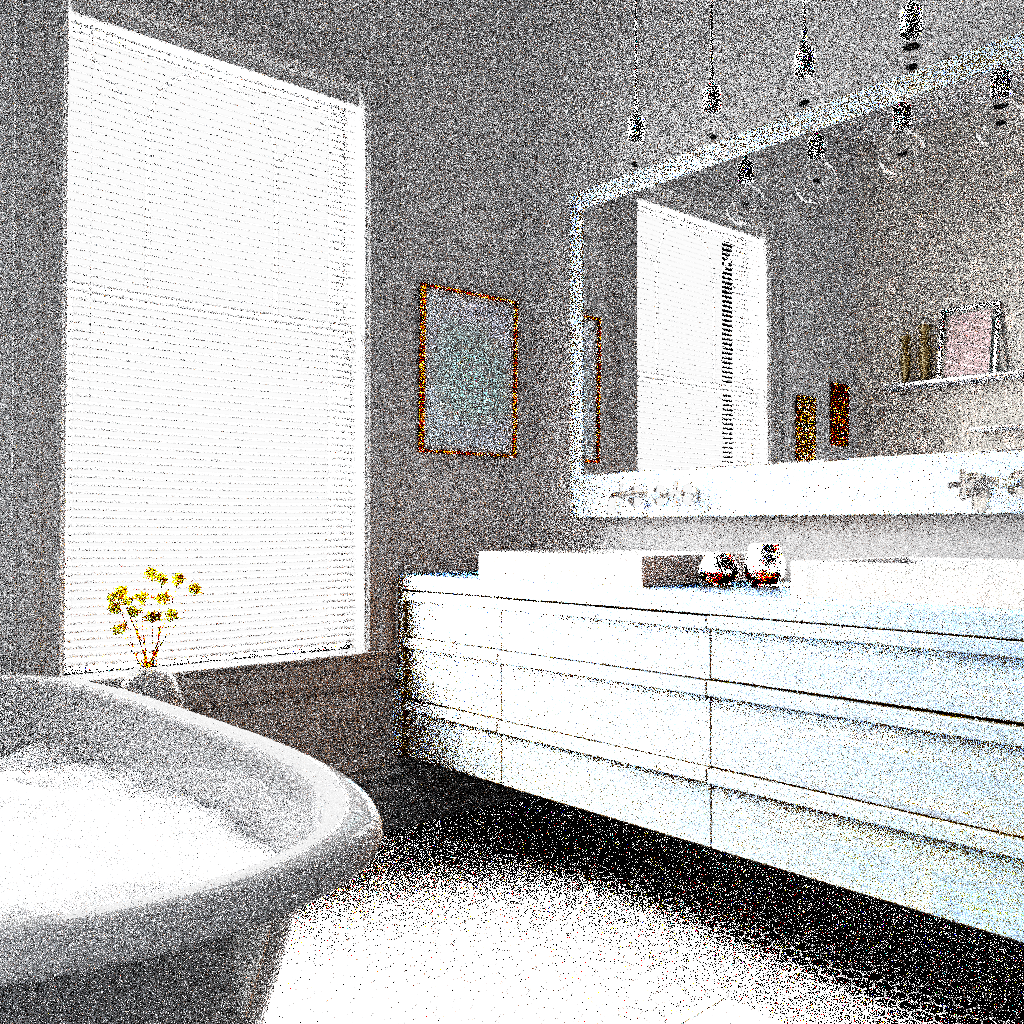

In [1]:
import numpy as np
import process
from common import envs, constants
bathroom_data, names_and_channels = process.LoadLowSpp(envs.data_path + "bathroom-16", True)
print(names_and_channels)
process.ImShow(bathroom_data[:,:,:3])

In [ ]:
bathroom_data[0,0,19:22]

In [ ]:
variance = process.GetVarianceMap(bathroom_data[:,:,:3], constants.patch_size, True)
process.ImShow(process.Make3Channels(variance * 255.0))

In [ ]:
data = bathroom_data
buffers = [data[:,:,:3], data[:,:,19:22]] # color and normal
metrics = ['relvar', 'variance']
weights = [1.0, 1.0]
# buffers = [data[:,:,:3]]
# metrics = ['relvar']
# weights = [1.0]
imp = process.GetImportanceMap(buffers, metrics, weights, constants.patch_size)
process.ImShow(process.Make3Channels(imp * 255.0))

In [ ]:
import matplotlib.pyplot as plt
patches = process.SamplePatchesProg(data.shape[:2], (constants.patch_size, constants.patch_size), constants.n_patches)
plt.figure(figsize=(15, 15))
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.invert_yaxis()
plt.scatter(list(a[0] for a in patches), list(a[1] for a in patches))
patches.shape

In [2]:
pad = constants.patch_size // 2
pruned = np.maximum(0, process.PrunePatches(data.shape[:2], patches + pad, constants.patch_size, imp) - pad)
plt.figure(figsize=(15,15))
ax = plt.gca()
ax.xaxis.set_ticks_position('top')
ax.invert_yaxis()
plt.scatter(list(a[0] for a in pruned), list(a[1] for a in pruned))
pruned.shape

NameError: name 'data' is not defined

In [2]:
cropped = process.CroppedFromFiles()

load data and gt: bathroom
size: 1024x1024
get 306 patches, 306 in total


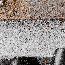

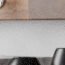

In [6]:
from IPython.display import display
display(process.ImShowPP(cropped[200]['data']))
display(process.ImShowPP(cropped[200]['gt']))